In [2]:
# Import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [3]:
# Only getting Data Analyst Jobs in the USA

df_DA_USA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

Text(0.5, 0, 'Yearly Salary')

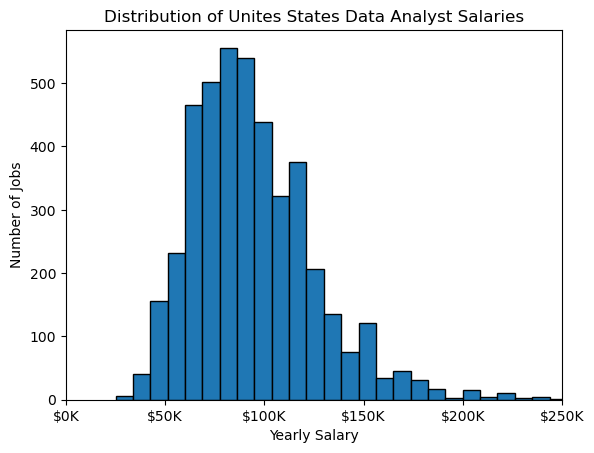

In [10]:
df_DA_USA['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 250_000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Distribution of Unites States Data Analyst Salaries')
plt.ylabel('Number of Jobs')
plt.xlabel('Yearly Salary')